### Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv("../data/20241204T03-00-00_20241206T03-00-00_6.csv")
df.head()


,TimeStamp,Tag Name,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,20241204T3:00:00.000,calc:Coldspray_data_,0.0,0.0,0.0,25,0.006,1,0.0,0.0,62.26,62.7,0.002,0.002
1,20241204T3:00:01.000,calc:Coldspray_data_,0.0,0.0,0.0,25,0.006,1,0.0,0.0,62.26,62.7,0.002,0.002
2,20241204T3:00:02.000,calc:Coldspray_data_,0.0,0.0,0.0,25,0.006,1,0.0,0.0,62.26,62.7,0.002,0.002
3,20241204T3:00:03.000,calc:Coldspray_data_,0.0,0.0,0.0,25,0.006,1,0.0,0.0,62.26,62.7,0.002,0.002
4,20241204T3:00:04.000,calc:Coldspray_data_,0.0,0.0,0.0,25,0.006,1,0.0,0.0,62.26,62.7,0.002,0.002


### Filter specific range of data

In [2]:
from datetime import datetime

# Convert TimeStamp column to datetime
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"], format="%Y%m%dT%H:%M:%S.%f")

# Define the time range
start_time = datetime.strptime("20241205T8:44:00.000", "%Y%m%dT%H:%M:%S.%f")
end_time = datetime.strptime("20241205T9:18:59.000", "%Y%m%dT%H:%M:%S.%f")

# Filter the DataFrame
filtered_df = df[(df["TimeStamp"] >= start_time) & (df["TimeStamp"] <= end_time)]

In [3]:
# import pytz

# utc = pytz.utc
# singapore = pytz.timezone("Asia/Singapore")

# def convert_to_singapore_time(utc_time):
#     # Localize to UTC and convert to Singapore time
#     singapore_time = utc.localize(utc_time).astimezone(singapore)
#     # Return only the time portion as a string
#     return singapore_time.strftime("%H:%M:%S")

# filtered_df["TimeStamp_Singapore"] = filtered_df["TimeStamp"].apply(convert_to_singapore_time)
# filtered_df.head()


### Exploratory Data Analysis (EDA)

In [4]:
import matplotlib.pyplot as plt

def plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3, figsize=(15, 5)):
    """
    Plots multiple columns of a DataFrame in a grid of subplots.

    Parameters:
        filtered_df (pd.DataFrame): The DataFrame containing the data to plot.
        y_columns (list): List of column names to plot.
        nrows (int): Number of rows in the grid.
        ncols (int): Number of columns in the grid.
        figsize (tuple): Figure size.

    Returns:
        None
    """
    # Create a grid of subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Plot each column in the corresponding subplot
    for i, column in enumerate(y_columns):
        if i < len(axes):  # Avoid indexing errors
            ax = axes[i]
            ax.plot(filtered_df[column], marker='.', label=column)
            ax.set_title(column, fontsize=10)
            ax.legend(fontsize=8)
            ax.grid(True)
            ax.get_xaxis().set_visible(False)  # Hide x-axis
            ax.set_ylabel(column, fontsize=8)

    # Remove unused subplots
    for i in range(len(y_columns), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()


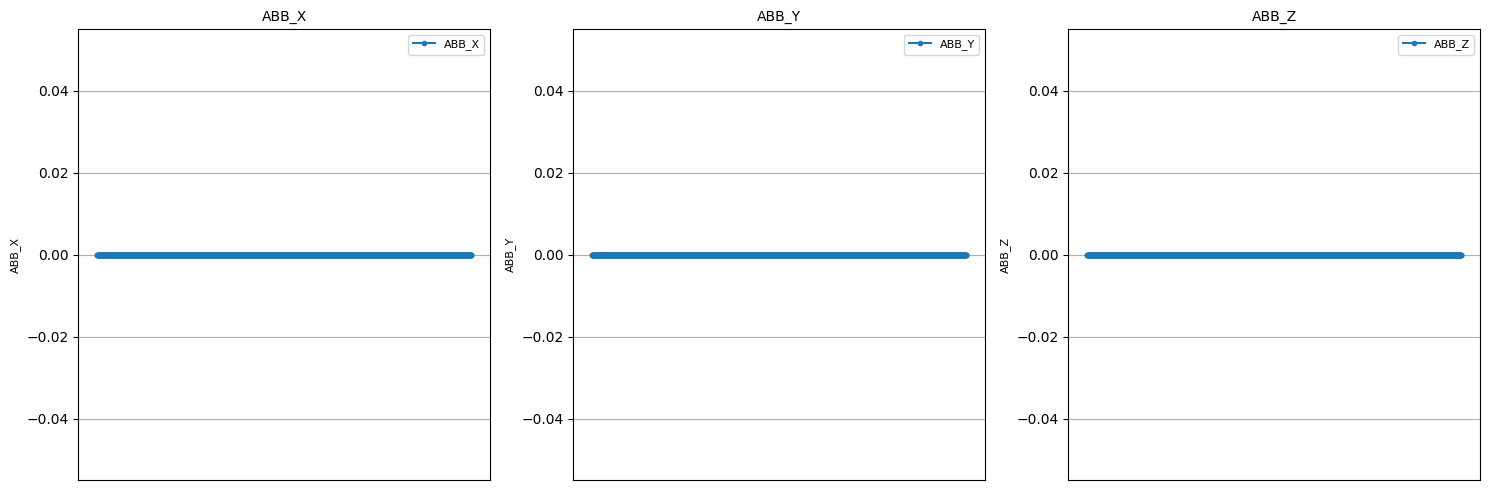

In [5]:
# List of columns for y-axis
y_columns = ["ABB_X", "ABB_Y", "ABB_Z"]
plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3)


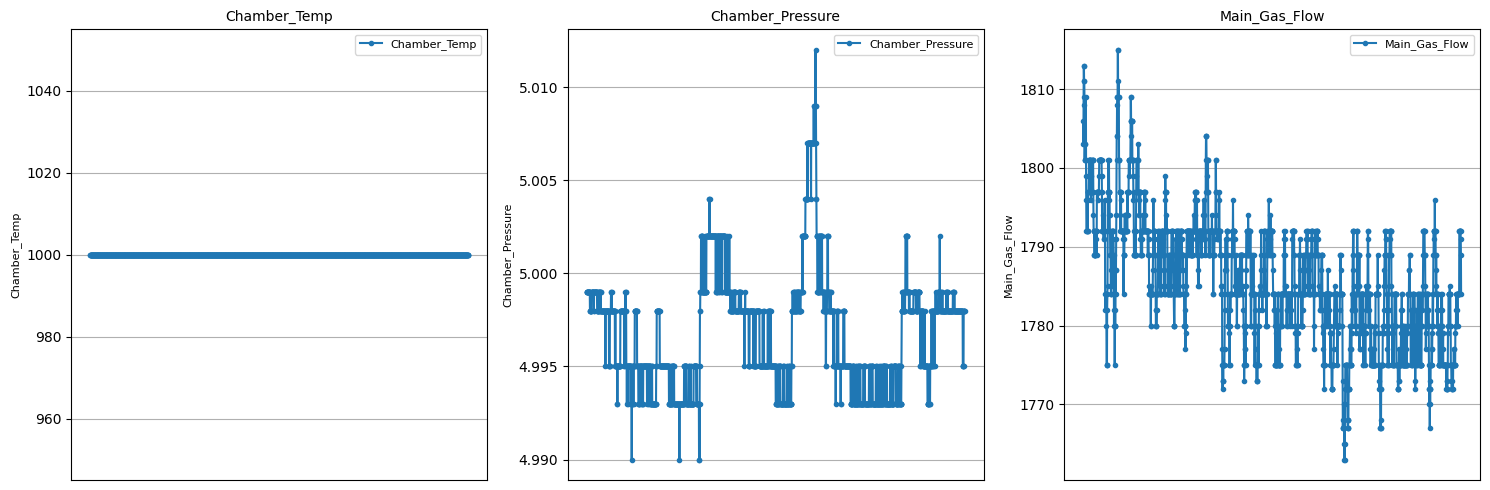

In [6]:
# List of columns for y-axis
y_columns = ["Chamber_Temp", "Chamber_Pressure", "Main_Gas_Flow"]
plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3)


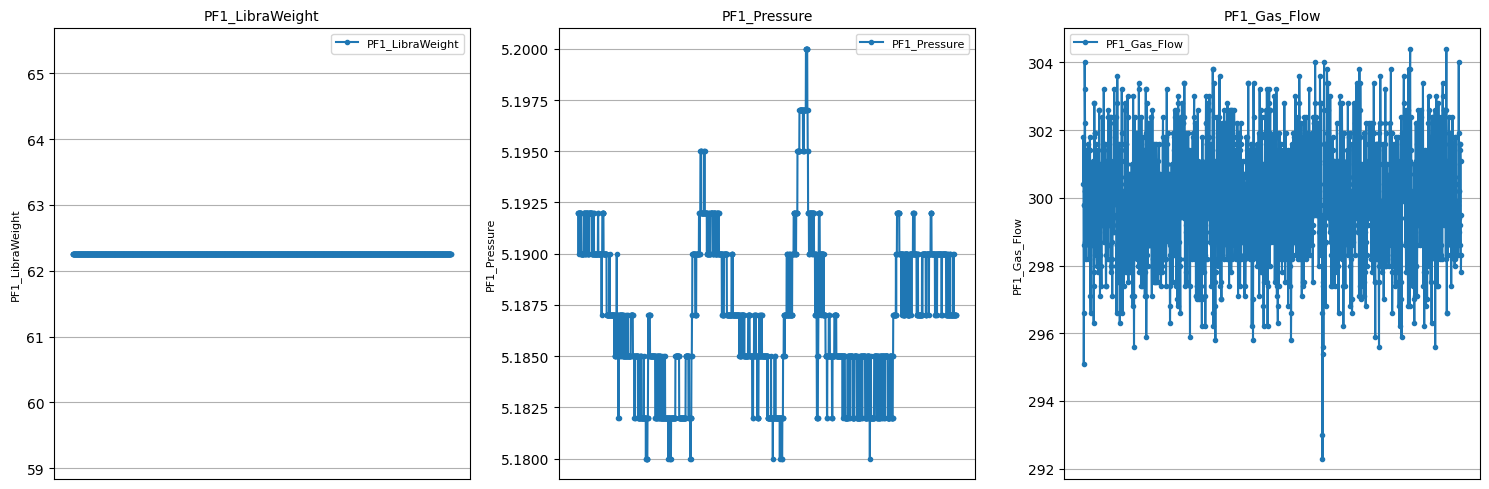

In [7]:
# List of columns for y-axis
y_columns = ["PF1_LibraWeight", "PF1_Pressure", "PF1_Gas_Flow"]
plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3)


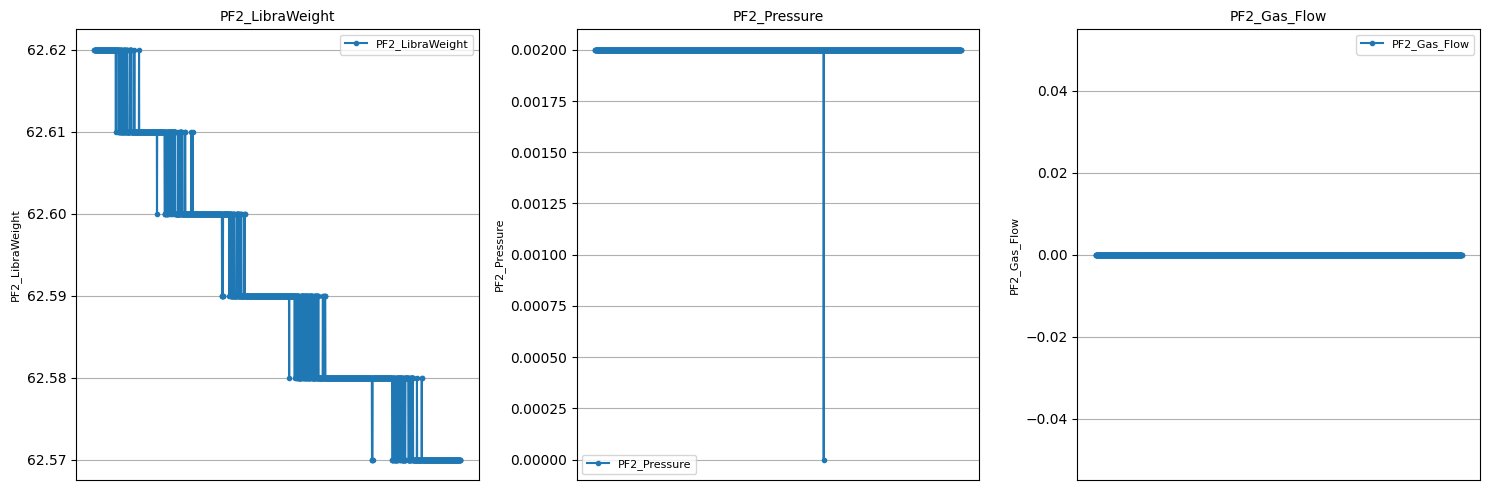

In [8]:
# List of columns for y-axis
y_columns = ["PF2_LibraWeight", "PF2_Pressure", "PF2_Gas_Flow"]
plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3)


In [9]:
len(filtered_df)

2100

Covariance Matrix


Covariance Matrix:
[[6.93394554e-06 2.39876727e-03 3.47943586e-04 7.77932684e-06]
 [2.39876727e-03 5.77118652e+01 2.47240210e-01 3.26997040e-03]
 [3.47943586e-04 2.47240210e-01 2.38429004e+00 7.15031525e-04]
 [7.77932684e-06 3.26997040e-03 7.15031525e-04 1.13659078e-05]]

No NaN values found in the covariance matrix.


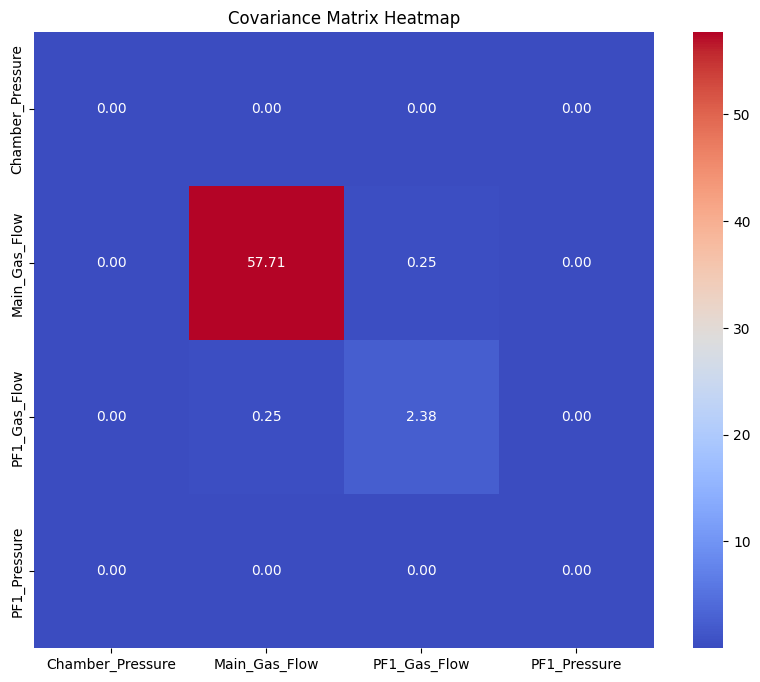

In [18]:
from sklearn.covariance import MinCovDet
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming `filtered_df` is already defined and contains the relevant data
pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Gas_Flow", "PF1_Pressure"]

# Filter the DataFrame for process parameters
pros_param_df = filtered_df[pros_param]

# Compute the robust covariance matrix
mcd = MinCovDet().fit(pros_param_df)
cov_matrix = mcd.covariance_

# Display the covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)

# Check if there are any NaN values in the covariance matrix
nan_indices = np.isnan(cov_matrix).any(axis=1)
if nan_indices.any():
    print("\nColumns leading to NaN in covariance matrix:")
    for i, nan_found in enumerate(nan_indices):
        if nan_found:
            col_name = pros_param[i]
            print(f"Analysis for column '{col_name}':")
            if pros_param_df[col_name].std() == 0:
                print(" - This column has constant values.")
            elif pros_param_df[col_name].isnull().all():
                print(" - This column contains only NaN values.")
            else:
                print(" - Mixed values or other issues may exist.")
else:
    print("\nNo NaN values found in the covariance matrix.")

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=pros_param, yticklabels=pros_param)
plt.title("Covariance Matrix Heatmap")
plt.show()


c:\Users\yongz\Desktop\CRP11_A02\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinCovDet was fitted with feature names
  warnings.warn(


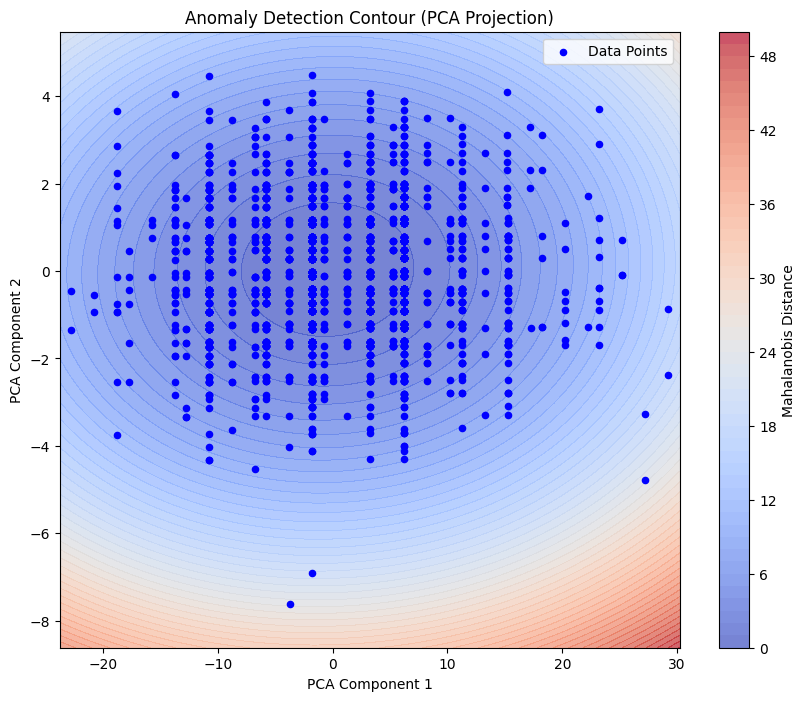

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
from matplotlib.colors import ListedColormap

# Step 1: Dimensionality Reduction
pca = PCA(n_components=2)
pros_param_2d = pca.fit_transform(pros_param_df)

# Step 2: Fit the MinCovDet model on the original 4D data
mcd = MinCovDet().fit(pros_param_df)

# Step 3: Create a grid for contour plotting
x_min, x_max = pros_param_2d[:, 0].min() - 1, pros_param_2d[:, 0].max() + 1
y_min, y_max = pros_param_2d[:, 1].min() - 1, pros_param_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Step 4: Evaluate the Mahalanobis distance (for anomaly score)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid)  # Transform back to 4D space
mahalanobis_dist = mcd.mahalanobis(grid_original).reshape(xx.shape)

# Step 5: Plot the contours
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, mahalanobis_dist, levels=50, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Mahalanobis Distance")
plt.scatter(pros_param_2d[:, 0], pros_param_2d[:, 1], c="blue", s=20, label="Data Points")
plt.title("Anomaly Detection Contour (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


### Unsupervised Learning

Mahalanobis Distance

In [12]:
from sklearn.covariance import MinCovDet

robust_cov = MinCovDet().fit(X)


C:\Users\yongz\AppData\Local\Temp\ipykernel_21612\474678331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pros_param_df["Mahalanobis"] = pros_param_df[pros_param].apply(


,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF1_Pressure,Mahalanobis
58808,4.999,1806,300.4,5.192,8.951280
58809,4.999,1803,301.8,5.192,8.143370
58810,4.999,1808,298.6,5.192,11.381246
58811,4.999,1813,295.1,5.190,21.916703
58812,4.999,1813,296.6,5.192,19.539862
...,...,...,...,...,...
60903,4.998,1792,301.4,5.187,2.164437
60904,4.998,1792,301.1,5.187,1.811394
60905,4.998,1791,299.5,5.187,0.988962
60906,4.998,1789,297.8,5.187,2.352059


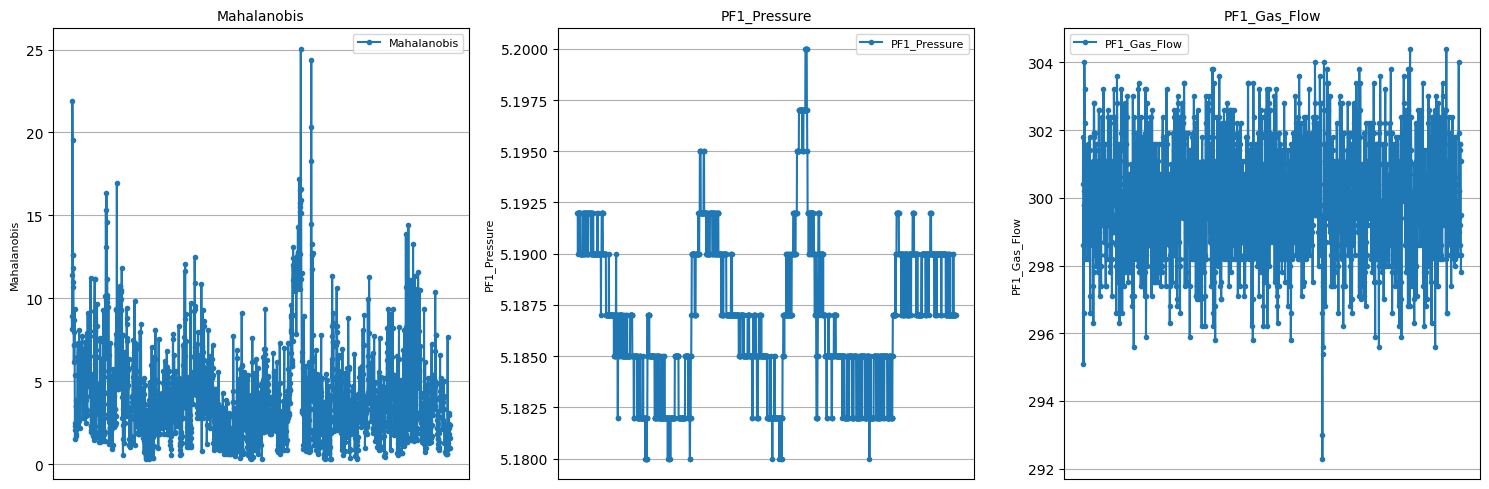

In [14]:
y_columns = ["Mahalanobis", "PF1_Pressure", "PF1_Gas_Flow"]
plot_columns_in_grid(pros_param_df, y_columns, nrows=1, ncols=3)

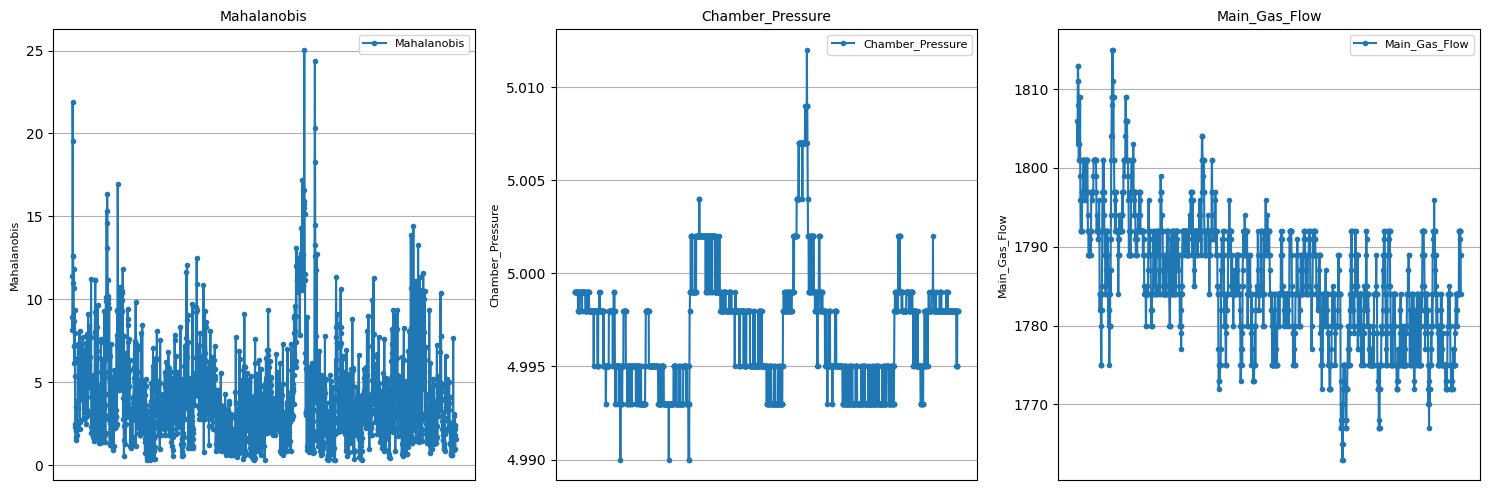

In [15]:
y_columns = ["Mahalanobis", "Chamber_Pressure", "Main_Gas_Flow"]
plot_columns_in_grid(pros_param_df, y_columns, nrows=1, ncols=3)


Elliptic Envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope

# Fit the EllipticEnvelope model
elliptic_env = EllipticEnvelope(contamination=0.1, random_state=42)  # Assume 10% contamination
elliptic_env.fit(pros_param_df[pros_param])

# Predict inliers and outliers
pros_param_df["Outlier"] = elliptic_env.predict(pros_param_df[pros_param])  # -1 for outliers, 1 for inliers

# Visualize results
plt.figure(figsize=(10, 6))
for feature in pros_param:
    plt.scatter(pros_param_df.index, pros_param_df[feature], c=pros_param_df["Outlier"], cmap='coolwarm', label=feature, marker='.')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("EllipticEnvelope Outlier Detection")
plt.xlabel("Index")
plt.ylabel("Feature Values")
plt.legend(pros_param, loc='upper left')
plt.show()

pros_param_df